<h1>Notebook Proyecto 1 - Inteligencia de Negocios </h1>

<b> Grupo 13 </b> <br>
<b> Manuel Sosa - 201815393 </b> <br>
<b> Simón Rendón - 201820112</b> <br>
<b> Juan David Díaz - 201729408 </b>


In [140]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions

In [141]:
# librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect
!pip install pandas-profiling==2.7.1

In [142]:
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juanddiaz13/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [143]:
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
# ¿Cuales son esas palabras vacías?

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juanddiaz13/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [144]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juanddiaz13/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [145]:
# Instalación de librerias

import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

from collections import Counter

import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juanddiaz13/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/juanddiaz13/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juanddiaz13/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h2> Cargar los datos </h2>

In [146]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('clinical_trials_on_cancer_data_clasificacion.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
df_textos=data

In [147]:
df_textos.head()

,label,study_and_condition
0,__label__0,study interventions are Saracatinib . recurren...
1,__label__1,study interventions are Stem cell transplantat...
2,__label__0,study interventions are Lenograstim . recurren...
3,__label__0,study interventions are Doxorubicin . stage ii...
4,__label__1,study interventions are Poly I-C . prostate ca...


In [148]:
df_textos.dtypes

label                  object
study_and_condition    object
dtype: object

<h2> 1. Perfilamiento de los datos </h2>

In [149]:
df_textos.duplicated().sum()

12

<p> Existen 12 campos duplicados </p> 

In [150]:
df_textos.isna().sum()

label                  0
study_and_condition    0
dtype: int64

<p> No existen nulos en la base de datos encontrados es nulo </p>

__label__0    6000
__label__1    6000
Name: label, dtype: int64


/Users/juanddiaz13/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='label'>

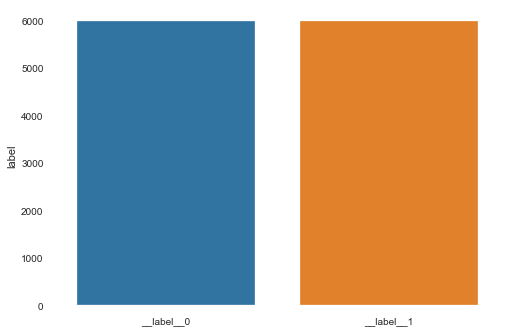

In [151]:
x=df_textos['label'].value_counts()
print(x)
sns.barplot(x.index,x)

<p> Hay 6000 datos de cada label. Esto significa que los datos están balanceados por lo que no se necesitará someter los datos a un proceso de balanceo </p> 

In [152]:
df_textos['word_count'] = df_textos['study_and_condition'].apply(lambda x: len(str(x).split()))
print("Promedio de palabras de __label__0 :",df_textos[df_textos['label']=='__label__0']['word_count'].mean()) 
print("Promedio de palabras de __label__1 :",df_textos[df_textos['label']=='__label__1']['word_count'].mean()) 

Promedio de palabras de __label__0 : 23.131166666666665
Promedio de palabras de __label__1 : 25.288833333333333


<p> El promedio de palabras que tienen tiene un campo que es tipo label 0 es de 23.13166... y para el label 1 es de 25.28883...</p>

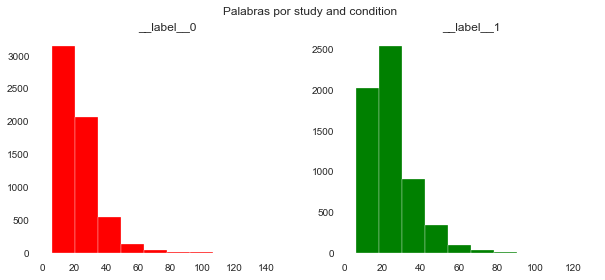

In [153]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_textos[df_textos['label']=='__label__0']['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('__label__0')
train_words=df_textos[df_textos['label']=='__label__1']['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('__label__1')
fig.suptitle('Palabras por study and condition')
plt.show()

In [154]:
df_textos['char_count'] = df_textos['study_and_condition'].apply(lambda x: len(str(x)))
print("Promedio de caracteres de __label__0 :",df_textos[df_textos['label']=='__label__0']['char_count'].mean()) 
print("Promedio de caracteres de __label__1 :",df_textos[df_textos['label']=='__label__1']['char_count'].mean()) 

Promedio de caracteres de __label__0 : 165.273
Promedio de caracteres de __label__1 : 182.292


<h2> 2. Preparación de los datos </h2>

In [155]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def preprocess(words):
    words = words.lower() 
    words= words.strip()  
    words=re.compile('<.*?>').sub('', words) 
    words = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', words)  
    words = re.sub('\s+', ' ', words)  
    words = re.sub(r'\[[0-9]*\]',' ',words) 
    words=re.sub(r'[^\w\s]', '', str(words).lower().strip())
    words = re.sub(r'\d',' ',words) 
    words = re.sub(r'\s+',' ',words) 
    return words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def stopword(words):
    """Remove stop words from list of tokenized words"""
    a= [i for i in words.split() if i not in stopwords.words('english')]
    return ' '.join(a)

def preprocessing(words):
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    textoFinal = ""
    for x in words:
        textoFinal+=x+" "
    return textoFinal

#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [156]:
df_textos['study_and_condition'] = df_textos['study_and_condition'].apply(contractions.fix)
df_textos['texto procesado'] = df_textos['study_and_condition'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
df_textos.head()

,label,study_and_condition,word_count,char_count,texto procesado
0,__label__0,study interventions are Saracatinib . recurren...,38,250,study interventions are Saracatinib recurrent ...
1,__label__1,study interventions are Stem cell transplantat...,32,224,study interventions are Stem cell transplantat...
2,__label__0,study interventions are Lenograstim . recurren...,33,229,study interventions are Lenograstim recurrent ...
3,__label__0,study interventions are Doxorubicin . stage ii...,46,268,study interventions are Doxorubicin stage iii ...
4,__label__1,study interventions are Poly I-C . prostate ca...,31,232,study interventions are Poly IC prostate cance...


In [157]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df_textos['clean_text'] = df_textos['texto procesado'].apply(lambda x: finalpreprocess(x))
df_textos.head()

,label,study_and_condition,word_count,char_count,texto procesado,clean_text
0,__label__0,study interventions are Saracatinib . recurren...,38,250,study interventions are Saracatinib recurrent ...,study intervention saracatinib recurrent verru...
1,__label__1,study interventions are Stem cell transplantat...,32,224,study interventions are Stem cell transplantat...,study intervention stem cell transplantation h...
2,__label__0,study interventions are Lenograstim . recurren...,33,229,study interventions are Lenograstim recurrent ...,study intervention lenograstim recurrent adult...
3,__label__0,study interventions are Doxorubicin . stage ii...,46,268,study interventions are Doxorubicin stage iii ...,study intervention doxorubicin stage iii diffu...
4,__label__1,study interventions are Poly I-C . prostate ca...,31,232,study interventions are Poly IC prostate cance...,study intervention poly ic prostate cancer dia...
